## ***Setup***

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
start_date = '2022-01-01'
end_date = '2024-01-01'

In [4]:
stock_data = yf.download(stocks,start=start_date,end=end_date)
stock_data.head()

[*********************100%%**********************]  4 of 4 completed


Adj Close                                           Close  \
                  AAPL        AMZN       GOOGL        MSFT        AAPL   
Date                                                                     
2022-01-03  179.953888  170.404495  144.991501  328.727722  182.009995   
2022-01-04  177.669983  167.522003  144.399506  323.090942  179.699997   
2022-01-05  172.943985  164.356995  137.774994  310.688141  174.919998   
2022-01-06  170.056976  163.253998  137.747498  308.233124  172.000000   
2022-01-07  170.225052  162.554001  137.016998  308.390228  172.169998   

                                                      High              ...  \
                  AMZN       GOOGL        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2022-01-03  170.404495  144.991501  334.750000  182.880005  170.703506  ...   
2022-01-04  167.522003  144.399506  329.010010  182.940002  171.399994  ...   
2022-01-05  164.356995  137.774994  316.380005  180.169998  167.126495  ...   
2022-01-06  163.253998  137.747498  313.880005  175.300003  164.800003  ...   
2022-01-07  162.554001  137.016998  314.040009  174.139999  165.243500  ...   

                   Low                    Open                          \
                 GOOGL        MSFT        AAPL        AMZN       GOOGL   
Date                                                                     
2022-01-03  143.712997  329.779999  177.830002  167.550003  145.054993   
2022-01-04  143.716507  326.119995  182.630005  170.438004  145.395996   
2022-01-05  137.688004  315.980011  179.610001  166.882996  144.419998   
2022-01-06  136.558502  311.489990  172.699997  163.450500  136.998505   
2022-01-07  135.766495  310.089996  172.889999  163.839005  138.145493   

                           Volume                                
                  MSFT       AAPL      AMZN     GOOGL      MSFT  
Date                                                             
2022-01-03  335.350006  104487900  63520000  28646000  28865100  
2022-01-04  334.829987   99310400  70726000  28400000  32674300  
2022-01-05  325.859985   94537600  64302000  54618000  40054300  
2022-01-06  313.149994   96904000  51958000  37348000  39646100  
2022-01-07  314.149994   86709100  46606000  29760000  32720000  

[5 rows x 24 columns]

# ***Opening Prices, Closing Prices and Volume Plots***

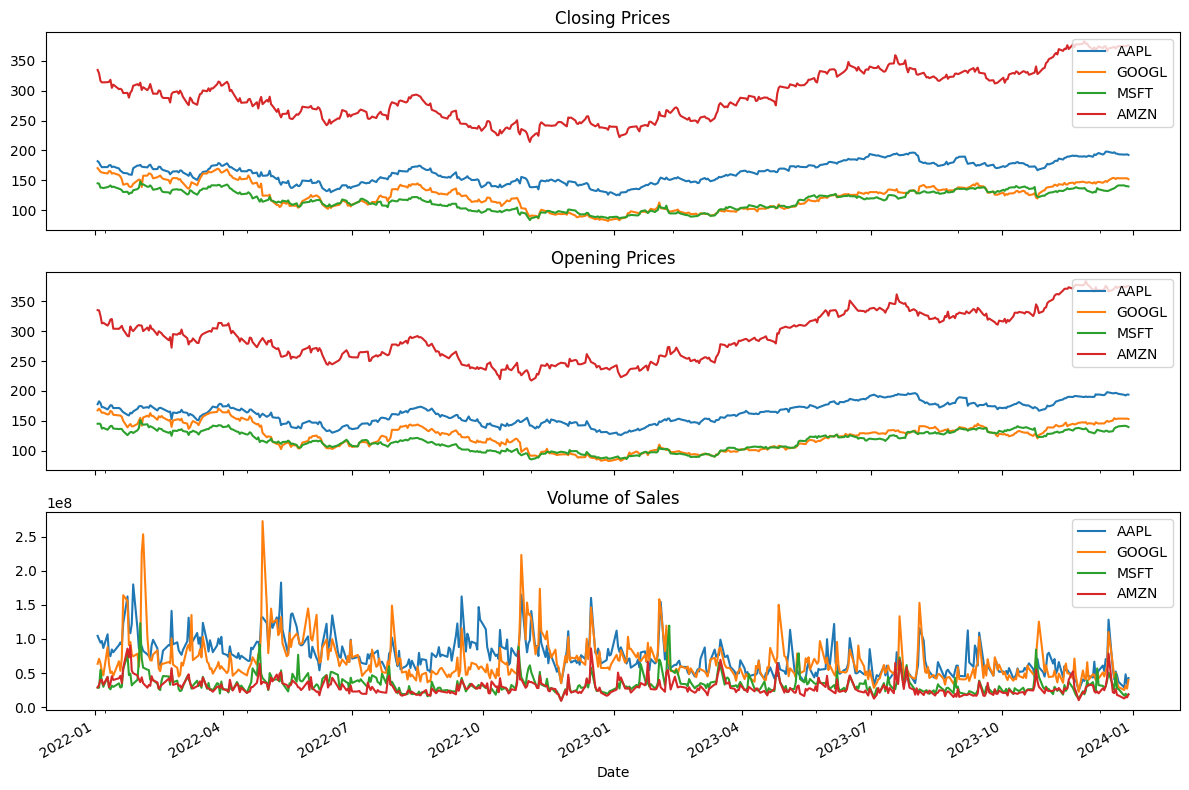

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True)
stock_data['Close'].plot(ax=axes[0], title='Closing Prices')
stock_data['Open'].plot(ax=axes[1], title='Opening Prices')
stock_data['Volume'].plot(ax=axes[2], title='Volume of Sales')
axes[0].legend(stocks)
axes[1].legend(stocks)
axes[2].legend(stocks)
plt.tight_layout()
plt.show()

# ***Moving Average Plot***

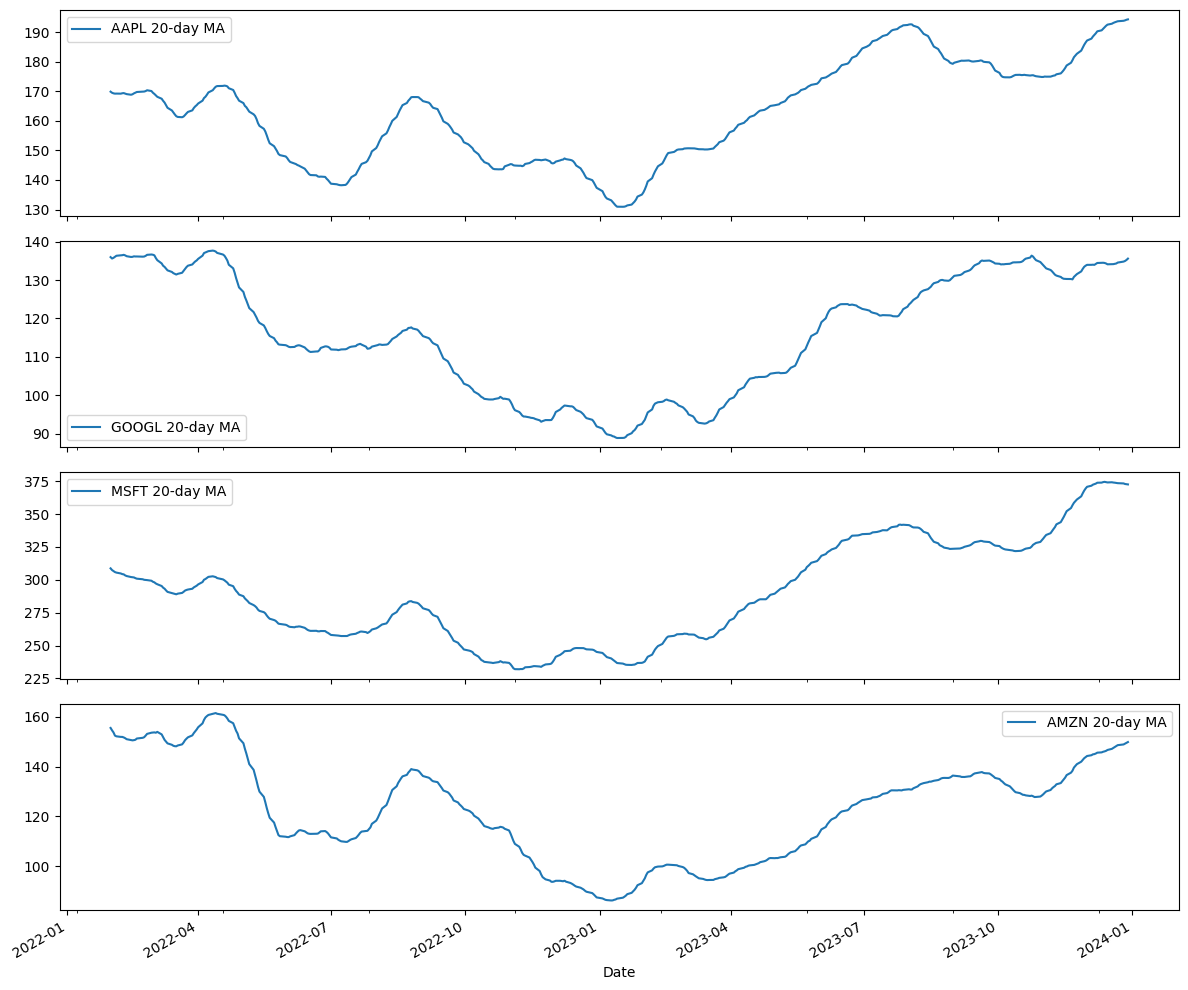

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

for stock in stocks:
    stock_data['Close'][stock].rolling(window=20).mean().plot(label=f'{stock} 20-day MA', ax=axes[stocks.index(stock)])

for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()

# ***Daily Return and Monthly Return***

In [14]:
daily_returns = stock_data['Adj Close'].pct_change()
daily_returns = daily_returns.drop('2022-01-03')
daily = daily_returns.resample('D').mean()
monthly_returns = daily_returns.resample('M').mean()
print(monthly_returns.head())

                AAPL      AMZN     GOOGL      MSFT
Date                                              
2022-01-31 -0.001912 -0.006575 -0.003457 -0.003676
2022-02-28 -0.002813  0.002179  0.000255 -0.001759
2022-03-31  0.002622  0.002919  0.001485  0.001573
2022-04-30 -0.004878 -0.012672 -0.009555 -0.004940
2022-05-31 -0.002200 -0.000930  0.000195 -0.000583


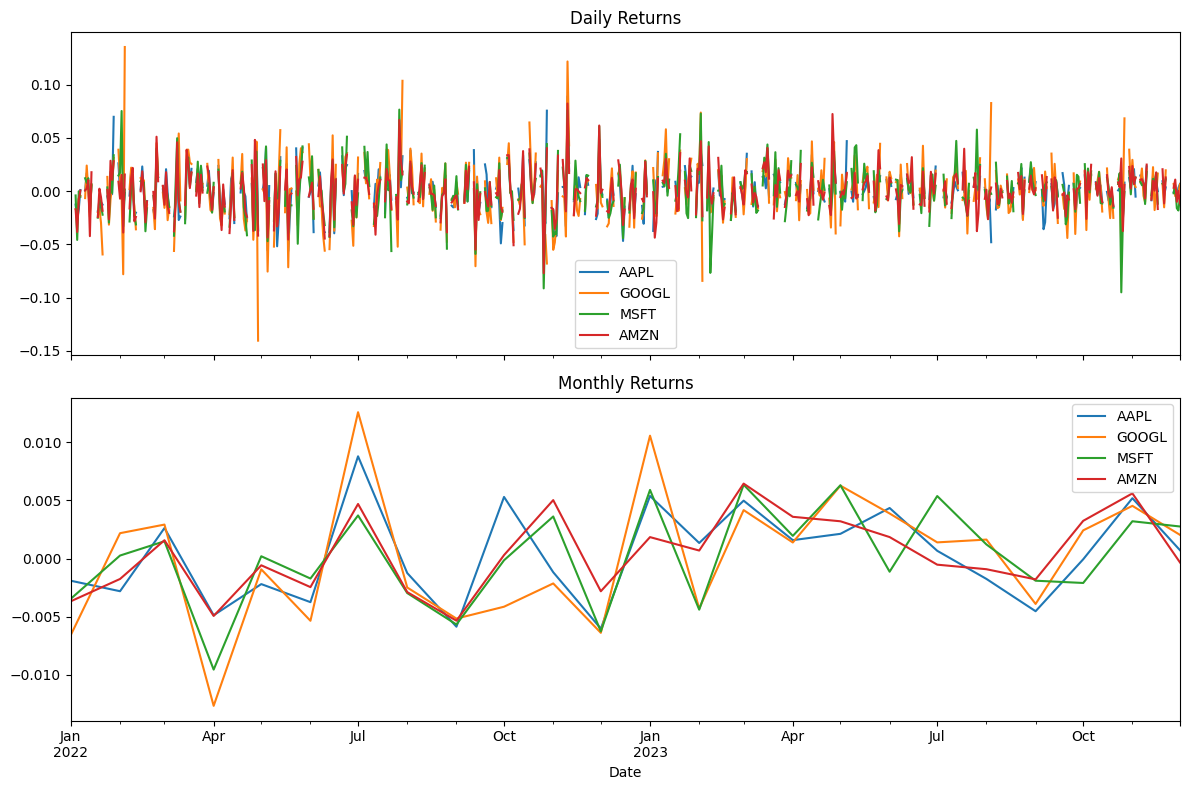

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)
daily.plot(ax=axes[0], title='Daily Returns')
monthly_returns.plot(ax=axes[1], title='Monthly Returns')
axes[0].legend(stocks)
axes[1].legend(stocks)
plt.tight_layout()
plt.show()

## ***HistoGram for Daily Return***

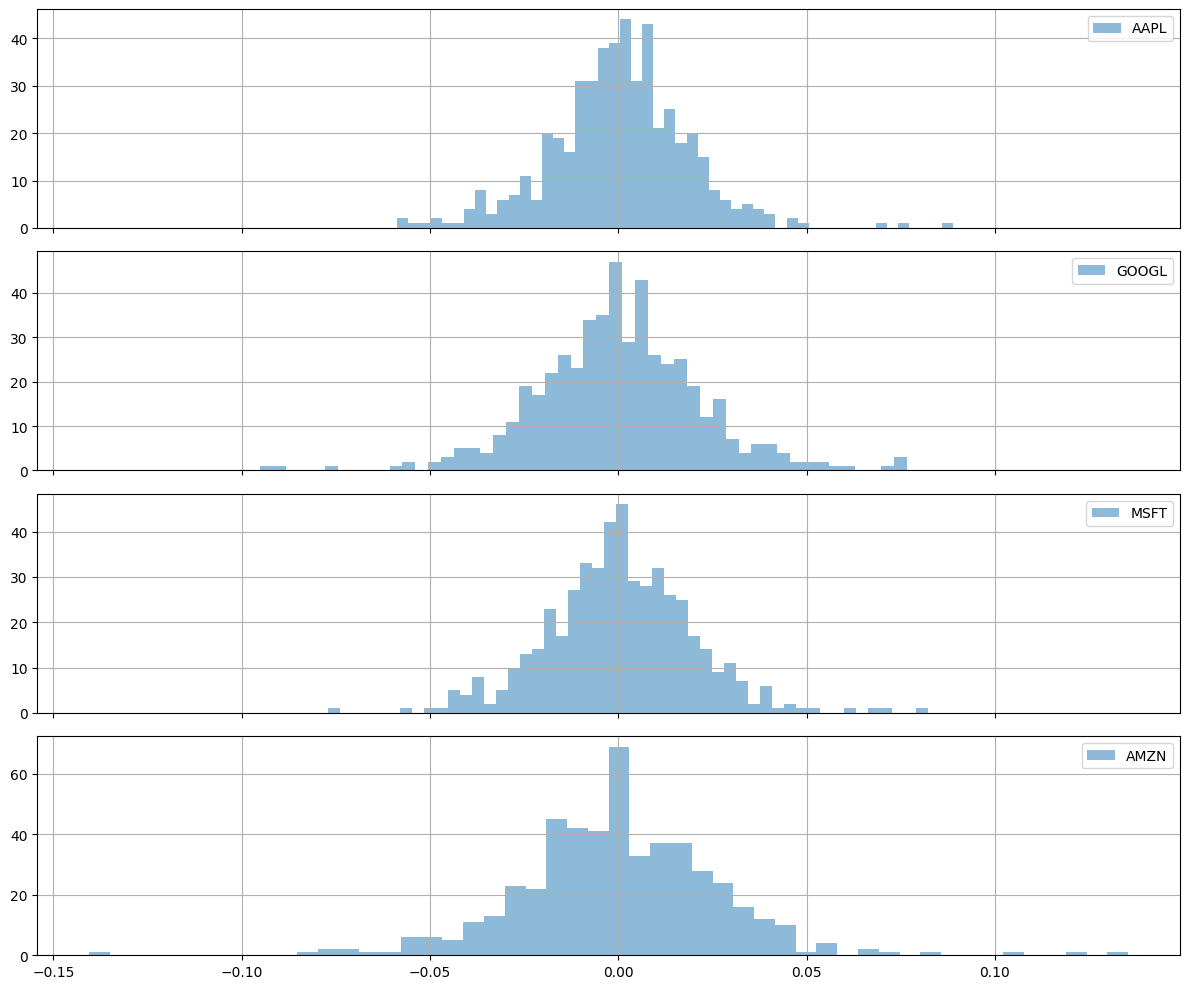

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

for stock in stocks:
    daily_returns[stock].hist(bins=50, label=stock, alpha=0.5, ax=axes[stocks.index(stock)])

for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()

## ***Correlation between different stocks Daily Returns and Volume of Sales***

In [17]:
print(daily_returns.corr())
print(stock_data['Volume'].corr())

           AAPL      AMZN     GOOGL      MSFT
AAPL   1.000000  0.622232  0.704408  0.740861
AMZN   0.622232  1.000000  0.681193  0.689821
GOOGL  0.704408  0.681193  1.000000  0.729521
MSFT   0.740861  0.689821  0.729521  1.000000
           AAPL      AMZN     GOOGL      MSFT
AAPL   1.000000  0.586259  0.325439  0.511364
AMZN   0.586259  1.000000  0.467064  0.475625
GOOGL  0.325439  0.467064  1.000000  0.642717
MSFT   0.511364  0.475625  0.642717  1.000000


## ***Risk-Return Plot***

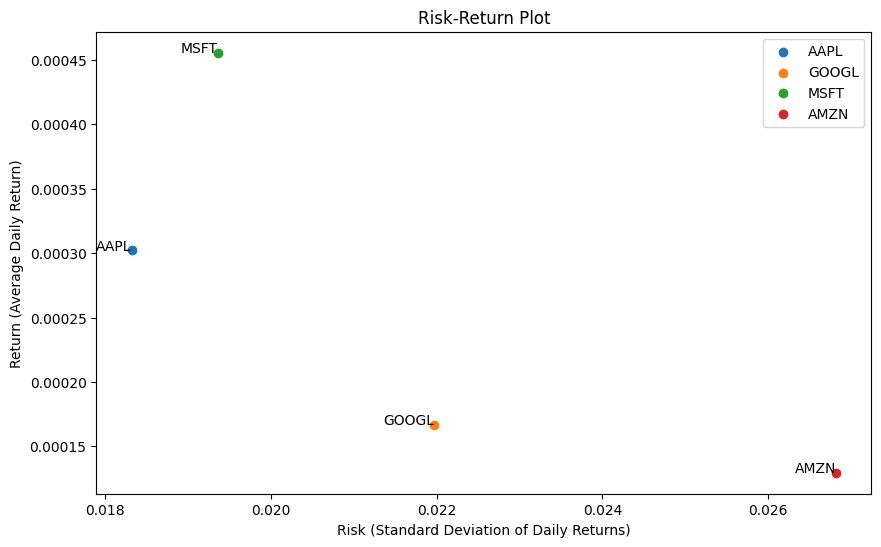

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

for stock in stocks:
    avg_return = daily_returns[stock].mean()
    risk = daily_returns[stock].std()
    ax.scatter(risk, avg_return, label=stock)
    ax.text(risk, avg_return, stock, ha='right')

ax.set(title='Risk-Return Plot', xlabel='Risk (Standard Deviation of Daily Returns)', ylabel='Return (Average Daily Return)')
ax.legend()
plt.show()